# Math 189 Final Project

### By Leah Seseri, Imangali Amangeldi

In [2]:
# read in data
train_data <- read.table("spam-train.txt", header = FALSE, sep = ",")
test_data <- read.table("spam-test.txt", header = FALSE, sep = ",")

In [4]:
# split features and labels
train_features <- train_data[, -58]
train_labels <- train_data[, 58]

test_features <- test_data[, -58]
test_labels <- test_data[, 58]

#### Standardize columns

In [7]:
# standardize columns with mean zero and unit variance
train_std_features <- scale(train_features)
test_std_features <- scale(test_features,
                           center = attr(train_std_features, "scaled:center"),
                           scale = attr(train_std_features, "scaled:scale"))

# combine standardize columns with labels
train_std <- data.frame(train_std_features, spam = train_labels)
test_std <- data.frame(test_std_features, spam = test_labels)

#### Transform using log

In [10]:
# transform features using log(x_ij + 1)
train_log_features <- log(train_features + 1)
test_log_features <- log(test_features + 1)

# combine log columns with labels
train_log <- data.frame(train_log_features, spam = train_labels)
test_log <- data.frame(test_log_features, spam = test_labels)

#### Transform using binary

In [13]:
# discretize each feature using I(x_ij > 0)
train_binary_features <- (train_features > 0) * 1
test_binary_features <- (test_features > 0) * 1

# combine binary columns with labels
train_binary <- data.frame(train_binary_features, spam = train_labels)
test_binary <- data.frame(test_binary_features, spam = test_labels)

## part a

In [16]:
library(ggplot2)

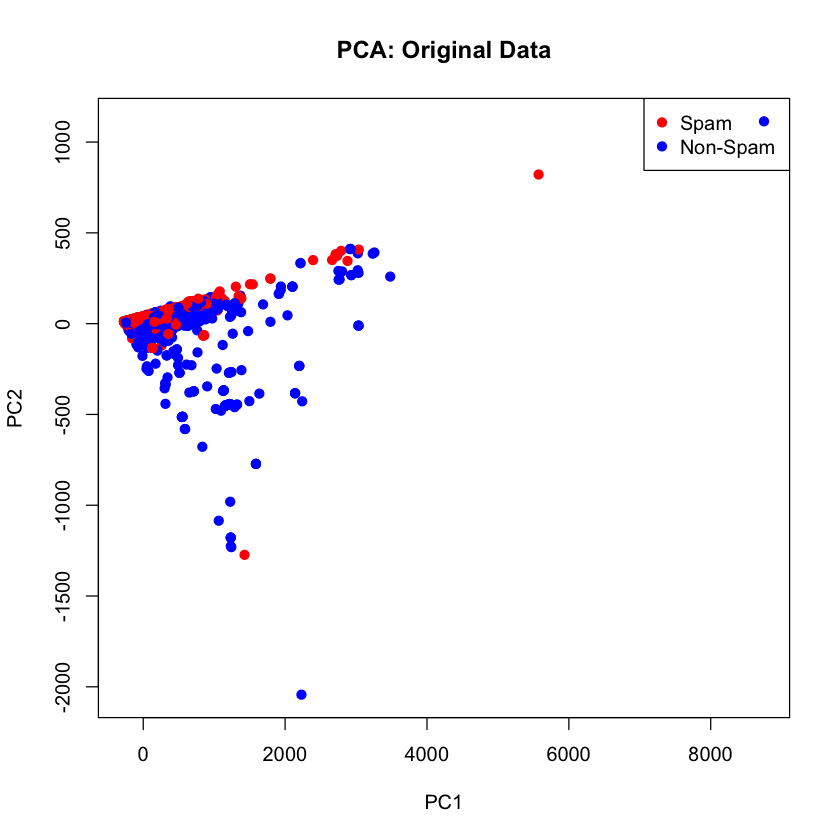

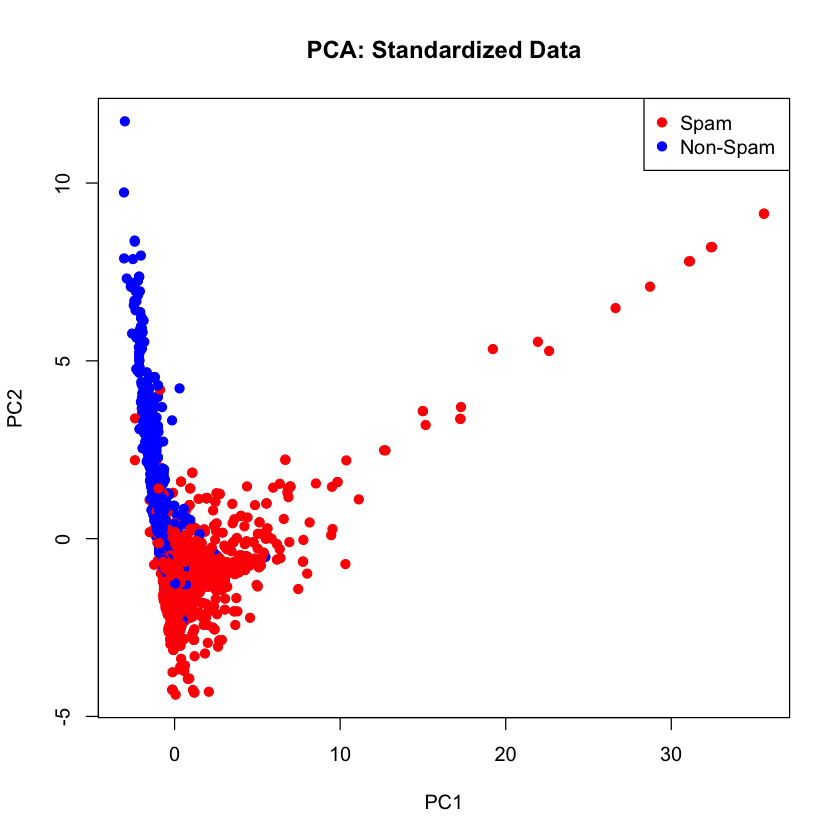

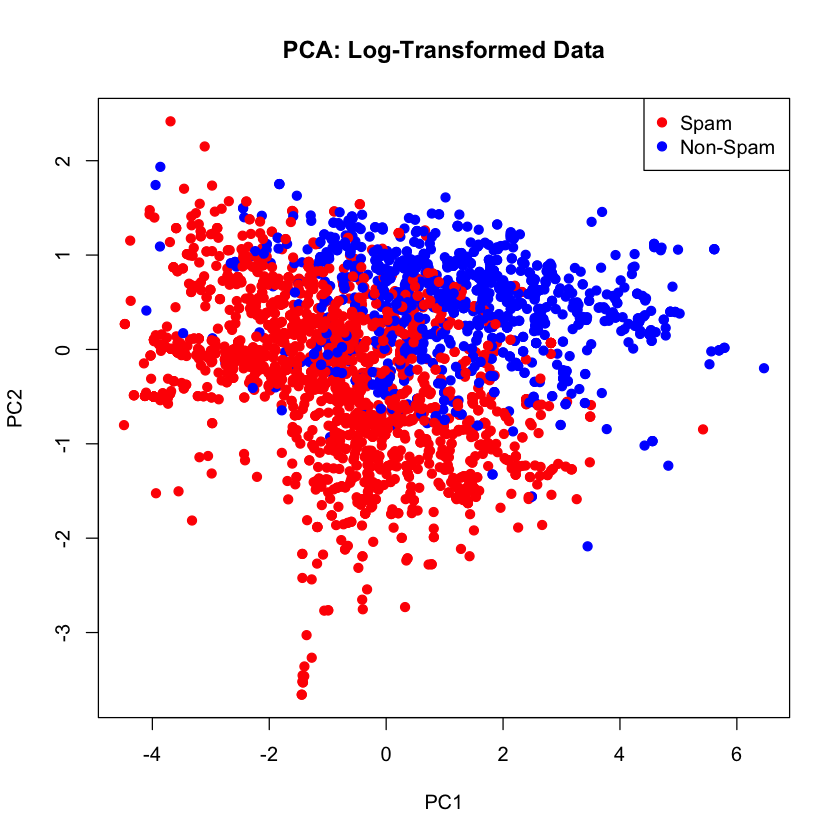

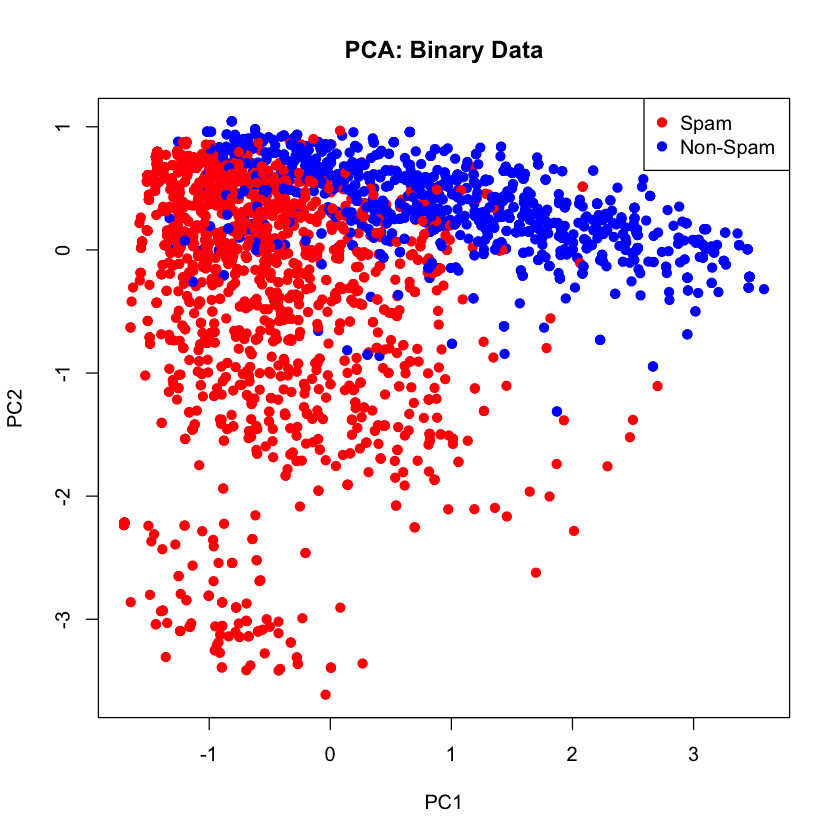

In [18]:
# PCA function to plot first 2 components
plot_pca <- function(data, labels, title) {
  pca <- prcomp(data, center = TRUE, scale. = FALSE)
  pcs <- data.frame(PC1 = pca$x[,1], PC2 = pca$x[,2], Label = factor(labels))
  cols <- c("1" = "red", "0" = "blue")
  plot(pcs$PC1, pcs$PC2, col = cols[pcs$Label], pch = 19,
       xlab = "PC1", ylab = "PC2", main = title)
  legend("topright", legend = c("Spam", "Non-Spam"), col = c("red", "blue"), pch = 19)
}

# original data PCA
plot_pca(train_data[, -58], train_labels, "PCA: Original Data")

# standardized data PCA
plot_pca(train_std_features, train_labels, "PCA: Standardized Data")

# log-transformed data PCA
plot_pca(train_log_features, train_labels, "PCA: Log-Transformed Data")

# binary data PCA
plot_pca(train_binary_features, train_labels, "PCA: Binary Data")

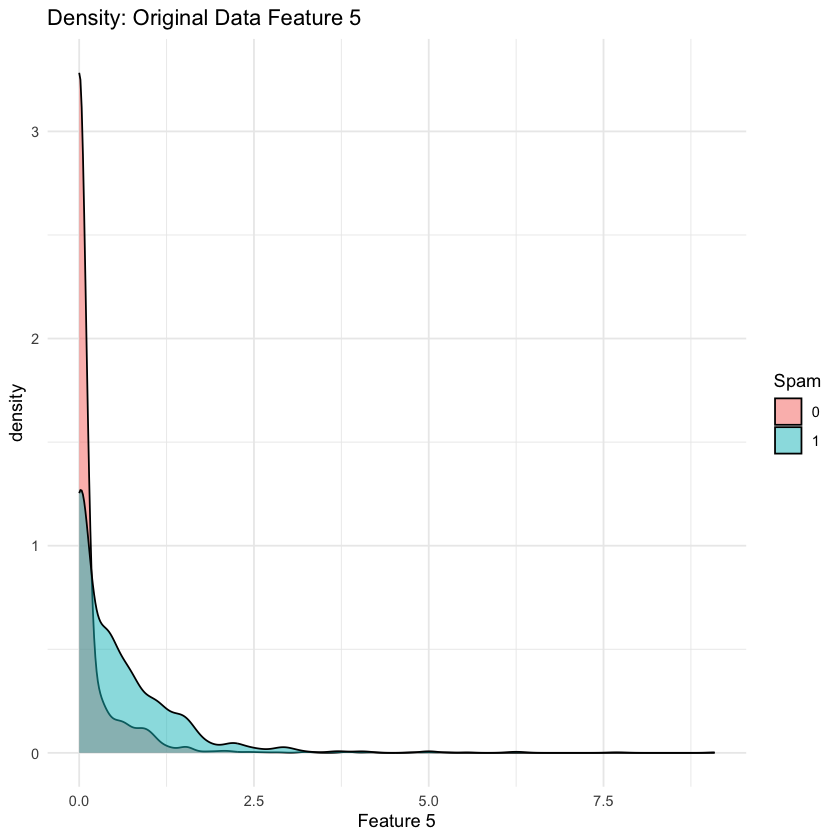

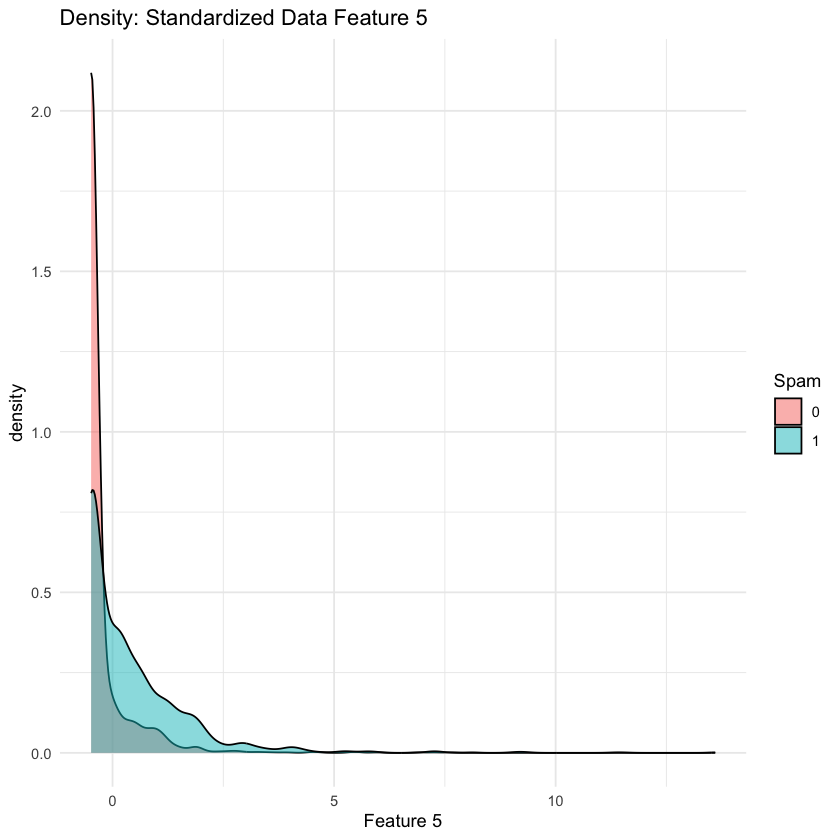

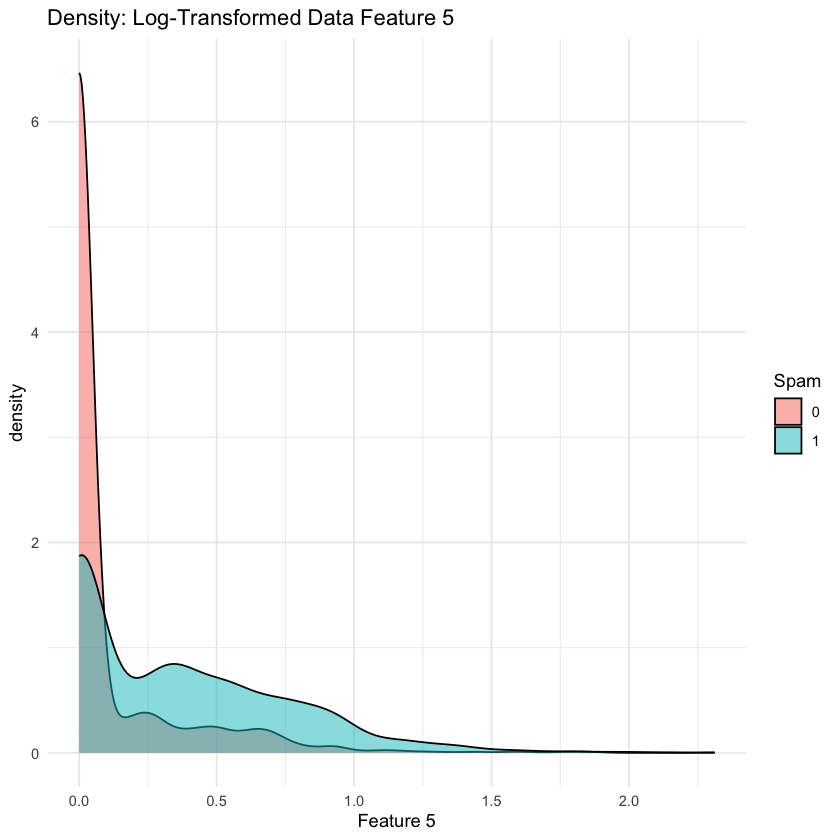

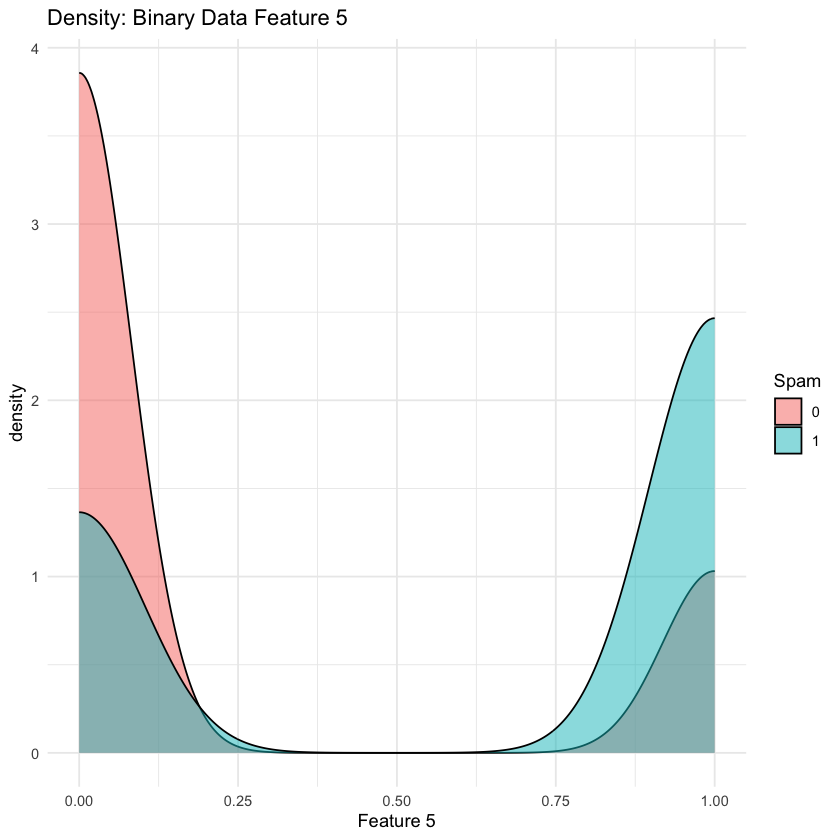

In [20]:
# density plots of a feature 
plot_density_feature <- function(data, labels, col_index, title) {
  df <- data.frame(Value = data[, col_index], Label = factor(labels))
  ggplot(df, aes(x = Value, fill = Label)) +
    geom_density(alpha = 0.5) +
    labs(title = title, x = paste("Feature", col_index), fill = "Spam") +
    theme_minimal()
}

# plot densities for each version, feature 5
print(plot_density_feature(train_data, train_labels, 5, "Density: Original Data Feature 5"))
print(plot_density_feature(train_std_features, train_labels, 5, "Density: Standardized Data Feature 5"))
print(plot_density_feature(train_log_features, train_labels, 5, "Density: Log-Transformed Data Feature 5"))
print(plot_density_feature(train_binary_features, train_labels, 5, "Density: Binary Data Feature 5"))

## part b

In [23]:
# fit logistic regression for original data
logit_model <- glm(V58 ~ ., data = train_data, family = binomial)

# predict on training and test data
train_probs <- predict(logit_model, type = "response")
test_probs <- predict(logit_model, newdata = test_data, type = "response")

# convert to class labels
train_preds <- ifelse(train_probs > 0.5, 1, 0)
test_preds <- ifelse(test_probs > 0.5, 1, 0)

# compute classification error
train_error <- mean(train_preds != train_data$V58)
test_error <- mean(test_preds != test_data$V58)

cat("Train error:", round(train_error, 4), "\n")
cat("Test error:", round(test_error, 4), "\n")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Train error: 0.0717 
Test error: 0.073 


In [25]:
# get p-values from the model summary
summary_model <- summary(logit_model)
pvals <- summary_model$coefficients[-1, 4]  # exclude intercept

# multiple testing correction: Bonferroni
bonferroni_cutoff <- 0.05 / length(pvals)
significant_features <- which(pvals < bonferroni_cutoff)

cat("Significant features after Bonferroni correction:\n")
print(significant_features)

Significant features after Bonferroni correction:
 V5  V7 V16 V17 V20 V21 V23 V25 V27 V45 V46 V52 V53 V56 V57 
  5   7  16  17  20  21  23  25  27  45  46  52  53  56  57 


In [27]:
# fit logistic regression for standardized data
logit_model_std <- glm(spam ~ ., data = train_std, family = binomial)

# predict on training and test data
train_probs <- predict(logit_model_std, type = "response")
test_probs <- predict(logit_model_std, newdata = test_std, type = "response")

# convert to class labels
train_preds <- ifelse(train_probs > 0.5, 1, 0)
test_preds <- ifelse(test_probs > 0.5, 1, 0)

# compute classification error
train_error <- mean(train_preds != train_std$spam)
test_error <- mean(test_preds != test_std$spam)

cat("Train error:", round(train_error, 4), "\n")
cat("Test error:", round(test_error, 4), "\n")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Train error: 0.0717 
Test error: 0.073 


In [29]:
# Get p-values from the model summary
summary_model <- summary(logit_model_std)
pvals <- summary_model$coefficients[-1, 4]  # exclude intercept

# multiple testing correction: Bonferroni
bonferroni_cutoff <- 0.05 / length(pvals)
significant_features <- which(pvals < bonferroni_cutoff)

cat("Significant features after Bonferroni correction:\n")
print(significant_features)

Significant features after Bonferroni correction:
 V5  V7 V16 V17 V20 V21 V23 V25 V27 V45 V46 V52 V53 V56 V57 
  5   7  16  17  20  21  23  25  27  45  46  52  53  56  57 


In [31]:
# fit logistic regression for log data
logit_model_log <- glm(spam ~ ., data = train_log, family = binomial)

# predict on training and test data
train_probs <- predict(logit_model_log, type = "response")
test_probs <- predict(logit_model_log, newdata = test_log, type = "response")

# convert to class labels
train_preds <- ifelse(train_probs > 0.5, 1, 0)
test_preds <- ifelse(test_probs > 0.5, 1, 0)

# compute classification error
train_error <- mean(train_preds != train_log$spam)
test_error <- mean(test_preds != test_log$spam)

cat("Train error:", round(train_error, 4), "\n")
cat("Test error:", round(test_error, 4), "\n")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Train error: 0.0577 
Test error: 0.0567 


In [33]:
# get p-values from the model summary
summary_model <- summary(logit_model_log)
pvals <- summary_model$coefficients[-1, 4]  # exclude intercept

# multiple testing correction: Bonferroni
bonferroni_cutoff <- 0.05 / length(pvals)
significant_features <- which(pvals < bonferroni_cutoff)

cat("Significant features after Bonferroni correction:\n")
print(significant_features)

Significant features after Bonferroni correction:
 V5  V7 V16 V17 V21 V23 V25 V27 V45 V46 V52 V53 V57 
  5   7  16  17  21  23  25  27  45  46  52  53  57 


In [35]:
# fit logistic regression for binary data
logit_model_binary <- glm(spam ~ ., data = train_binary, family = binomial)

# predict on training and test data
train_probs <- predict(logit_model_binary, type = "response")
test_probs <- predict(logit_model_binary, newdata = test_binary, type = "response")

# convert to class labels
train_preds <- ifelse(train_probs > 0.5, 1, 0)
test_preds <- ifelse(test_probs > 0.5, 1, 0)

# compute classification error
train_error <- mean(train_preds != train_binary$spam)
test_error <- mean(test_preds != test_binary$spam)

cat("Train error:", round(train_error, 4), "\n")
cat("Test error:", round(test_error, 4), "\n")

Train error: 0.0571 
Test error: 0.0808 


In [37]:
# get p-values from the model summary
summary_model <- summary(logit_model_binary)
pvals <- summary_model$coefficients[-1, 4]  # exclude intercept

# multiple testing correction: Bonferroni
bonferroni_cutoff <- 0.05 / length(pvals)
significant_features <- which(pvals < bonferroni_cutoff)

cat("Significant features after Bonferroni correction:\n")
print(significant_features)

Significant features after Bonferroni correction:
 V5  V7 V11 V13 V16 V17 V21 V23 V24 V25 V27 V28 V37 V42 V45 V46 V52 V53 
  5   7  11  13  16  17  21  23  24  25  27  28  37  42  45  46  52  53 


## part c

In [40]:
# ensure that spam is a factor not numeric
train_std$spam <- factor(train_std$spam)
test_std$spam <- factor(test_std$spam)

train_log$spam <- factor(train_log$spam)
test_log$spam <- factor(test_log$spam)

train_binary$spam <- factor(train_binary$spam)
test_binary$spam <- factor(test_binary$spam)

In [42]:
# install.packages("MASS")
library(MASS)

In [44]:
# LDA on standardized data
lda_std <- lda(spam ~ ., data = train_std)

# predict train and test
train_pred_lda_std <- predict(lda_std, train_std)$class
test_pred_lda_std <- predict(lda_std, test_std)$class

# calculate classification error rates
train_error_lda_std <- mean(train_pred_lda_std != train_std$spam)
test_error_lda_std <- mean(test_pred_lda_std != test_std$spam)

cat("LDA on standardized data - Train error:", round(train_error_lda_std, 4), "\n")
cat("LDA on standardized data - Test error:", round(test_error_lda_std, 4), "\n")

LDA on standardized data - Train error: 0.1017 
LDA on standardized data - Test error: 0.0958 


In [46]:
# QDA on standardized data
qda_std <- qda(spam ~ ., data = train_std)

# predict train and test
train_pred_qda_std <- predict(qda_std, train_std)$class
test_pred_qda_std <- predict(qda_std, test_std)$class

# calculate classification error rates
train_error_qda_std <- mean(train_pred_qda_std != train_std$spam)
test_error_qda_std <- mean(test_pred_qda_std != test_std$spam)

cat("QDA on standardized data - Train error:", round(train_error_qda_std, 4), "\n")
cat("QDA on standardized data - Test error:", round(test_error_qda_std, 4), "\n")

QDA on standardized data - Train error: 0.1787 
QDA on standardized data - Test error: 0.1838 


In [48]:
# LDA on log-transformed data
lda_log <- lda(spam ~ ., data = train_log)

# predict train and test
train_pred_lda_log <- predict(lda_log, train_log)$class
test_pred_lda_log <- predict(lda_log, test_log)$class

# calculate classification error rates
train_error_lda_log <- mean(train_pred_lda_log != train_log$spam)
test_error_lda_log <- mean(test_pred_lda_log != test_log$spam)

cat("LDA on log-transformed data - Train error:", round(train_error_lda_log, 4), "\n")
cat("LDA on log-transformed data - Test error:", round(test_error_lda_log, 4), "\n")

LDA on log-transformed data - Train error: 0.0603 
LDA on log-transformed data - Test error: 0.0652 


In [50]:
# QDA on log-transformed data
qda_log <- qda(spam ~ ., data = train_log)

# predict train and test
train_pred_qda_log <- predict(qda_log, train_log)$class
test_pred_qda_log <- predict(qda_log, test_log)$class

# calculate classification error rates
train_error_qda_log <- mean(train_pred_qda_log != train_log$spam)
test_error_qda_log <- mean(test_pred_qda_log != test_log$spam)

cat("QDA on log-transformed data - Train error:", round(train_error_qda_log, 4), "\n")
cat("QDA on log-transformed data - Test error:", round(test_error_qda_log, 4), "\n")

QDA on log-transformed data - Train error: 0.1588 
QDA on log-transformed data - Test error: 0.1571 


## part d

In [53]:
# install.packages("e1071")
library(e1071)

In [55]:
run_svm <- function(train_data, test_data, kernel_type = "linear", cost = 1) {
  model <- svm(spam ~ ., data = train_data, kernel = kernel_type, cost = cost)
  
  train_pred <- predict(model, train_data)
  test_pred <- predict(model, test_data)
  
  train_error <- mean(train_pred != train_data$spam)
  test_error <- mean(test_pred != test_data$spam)
  
  cat("SVM with", kernel_type, "kernel:\n")
  cat("  training classification error:", round(train_error, 4), "\n")
  cat("  test classification error:", round(test_error, 4), "\n\n")
}

In [57]:
# linear SVM for standardized data
run_svm(train_std, test_std, kernel_type = "linear")

# nonlinear SVM for standardize data
run_svm(train_std, test_std, kernel_type = "radial")

SVM with linear kernel:
  training classification error: 0.0649 
  test classification error: 0.0684 

SVM with radial kernel:
  training classification error: 0.0515 
  test classification error: 0.0645 



In [59]:
# linear SVM for log-transformed data
run_svm(train_log, test_log, kernel_type = "linear")

# nonlinear SVM for log-transformed data
run_svm(train_log, test_log, kernel_type = "radial")

SVM with linear kernel:
  training classification error: 0.0541 
  test classification error: 0.0515 

SVM with radial kernel:
  training classification error: 0.0388 
  test classification error: 0.045 



In [61]:
# remove constant columns in binary version
constant_cols <- sapply(train_binary[, -ncol(train_binary)], function(col) length(unique(col)) == 1)
train_binary_clean <- train_binary[, !constant_cols]
test_binary_clean <- test_binary[, !constant_cols]

# add back label
train_binary_clean$spam <- train_binary$spam
test_binary_clean$spam <- test_binary$spam

In [63]:
# linear SVM for binary data
run_svm(train_binary_clean, test_binary_clean, kernel_type = "linear")

# nonlinear SVM for binary data
run_svm(train_binary_clean, test_binary_clean, kernel_type = "radial")

SVM with linear kernel:
  training classification error: 0.058 
  test classification error: 0.075 

SVM with radial kernel:
  training classification error: 0.0342 
  test classification error: 0.0561 



#### report classification errors using diff methods and diff preprocessed data in table and comment on diff performances

In [67]:
library(knitr)

In [89]:
# Create a data frame with your results
results <- data.frame(
  preprocessed_data = c("Original", "Standardized", "Log-Transformed", "Binary",
                    "Standardized", "Log-Transformed", "Standardized", "Log-Transformed",
                    "Standardized", "Log-Transformed", "Binary",
                    "Standardized", "Log-Transformed", "Binary"),
  method = c("Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression",
             "LDA", "LDA", "QDA", "QDA",
             "SVM (Linear)", "SVM (Linear)", "SVM (Linear)",
             "SVM (RBF)", "SVM (RBF)", "SVM (RBF)"),
  training_error = c(0.072, 0.072, 0.058, 0.057,
                  0.102, 0.060, 0.179, 0.159,
                  0.065, 0.054, 0.058,
                  0.052, 0.039, 0.034),
  test_error = c(0.073, 0.073, 0.057, 0.081,
                 0.096, 0.065, 0.184, 0.157,
                 0.068, 0.052, 0.075,
                 0.065, 0.045, 0.056)
)

kable(results, caption = "Classification Errors Across Methods and Preprocessing Data")



Table: Classification Errors Across Methods and Preprocessing Data

|preprocessed_data |method              | training_error| test_error|
|:-----------------|:-------------------|--------------:|----------:|
|Original          |Logistic Regression |          0.072|      0.073|
|Standardized      |Logistic Regression |          0.072|      0.073|
|Log-Transformed   |Logistic Regression |          0.058|      0.057|
|Binary            |Logistic Regression |          0.057|      0.081|
|Standardized      |LDA                 |          0.102|      0.096|
|Log-Transformed   |LDA                 |          0.060|      0.065|
|Standardized      |QDA                 |          0.179|      0.184|
|Log-Transformed   |QDA                 |          0.159|      0.157|
|Standardized      |SVM (Linear)        |          0.065|      0.068|
|Log-Transformed   |SVM (Linear)        |          0.054|      0.052|
|Binary            |SVM (Linear)        |          0.058|      0.075|
|Standardized      |

The log-transformed data generally led to better classification performance across the methods logistic regression, LDA, QDA, and both linear and nonlinear SVM. The test error was the lowest when compared to the standardized data and binary data. Binary preprocessing performed well, specifically while using SVM with the RBF kernel, but the test errors were higher than compared to the other transformations like log or standardization. Standardization improved the performance over the raw data for methods like SVM with linear kernel, but less for logistic regression. Overall, SVM, specifically with nonlinear kernels, had the best performance across all the preprocessed data which suggests that nonlinear boundaries better capture the structure of the data. Linear SVM also performed well, but the lowest training error was with the RBF kernel on the binary data and the lowest test error was with the RBF kernel on the log-transformed data. QDA performed the worst out of all the methods suggesting that it struggled to generalize well. LDA had slightly higher errors than logstic regression, but performed decently with the log-transformed data. Logistic regression performed well overall and was fairly stable across all the preprocessing methods. The logistic regression and SVM models had smaller differences between the training and test errors showing that they generalized better. Overall, the model performed the best while using the log-transformed data on SVM with the RBF kernel. 

#### use either single method w properly chosen tuning param or combination of several methods to design classifier w test error rate as small as possible

#### describe recommended method and report performance